In [36]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
import numpy as np
import datetime as dt
from matplotlib import style

style.use('fivethirtyeight')

MA1= 10
MA2 = 30

In [37]:
tsla = pdr.DataReader('tsla', data_source='yahoo', start='2018-1-1') 
tsla.reset_index(inplace=True)
tsla.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
341,2019-05-13,232.470001,224.500000,232.009995,227.009995,10834800,227.009995
342,2019-05-14,234.500000,228.000000,229.300003,232.309998,7252400,232.309998
343,2019-05-15,232.440002,225.250000,229.320007,231.949997,7296000,231.949997
344,2019-05-16,231.000000,226.500000,229.490005,228.330002,7483300,228.330002
345,2019-05-17,222.240005,208.919998,221.960007,211.029999,17757800,211.029999


In [38]:
def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def moving_average(values, window):
    weights = np.repeat(1.0, window)/ window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows
    
date_conv = np.vectorize(dt.datetime.fromtimestamp)    

In [39]:
date = tsla.loc[:, 'Date'].values
date = date2num(date)
openp = tsla.loc[:, 'Open'].values
highp = tsla.loc[:, 'High'].values
lowp = tsla.loc[:, 'Low'].values
closep = tsla.loc[:,'Close'].values
volume = tsla.loc[:, 'Volume'].values

ma1 = moving_average(closep, MA1)
ma2 = moving_average(closep, MA2)
start = len(date[MA2-1:])
print(start)

x = 0
y = len(date)
new_list = []
while x<y:
    append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
    new_list.append(append_line)
    x += 1

317


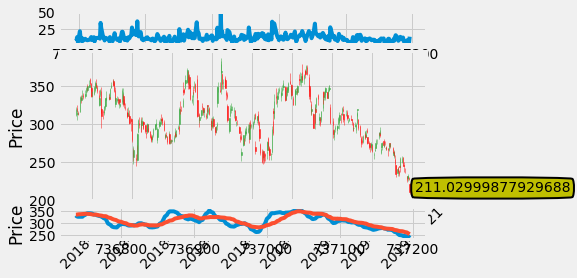

In [40]:
fig = plt.figure()
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((6,1),(1,0), rowspan=4, colspan=1)
plt.ylabel('Price')
#plt.xlabel('Date')
ax3 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1)

h_1 = list(map(high_minus_low, highp, lowp))
ax1.plot(date, h_1)

candlestick_ohlc(ax2, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
ax2.grid(True) #, color = 'm', linestyle='-',linewidth=0.3)

for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 

bbox_props = dict(boxstyle='round4, pad=0.3', fc="y", ec='k', lw=2)
ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
            xytext = (date[-1]+8, closep[-1]), bbox = bbox_props)

ax3.plot(date[-start:], ma1[-start:])
ax3.plot(date[-start:], ma2[-start:])

plt.ylabel('Price')

plt.subplots_adjust(left=0.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
plt.show()